#### Notes:
    1. Check than Kalman Filter works fine in general mode.
    2. Check that Kalman FIlter solve CPs task fine for syth data.

# Import libs

In [1]:
import sys
sys.path.append("../..")

In [2]:
from models.ProbabilityBased import KalmanFilter
from data.SythData import LinearSteps, SinusoidWaves

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Generate Data

In [24]:
# data = LinearSteps(length_data=2000, cps_number=5, white_noise_level="default").get()
data = SinusoidWaves(length_data=4000, cps_number=2, white_noise_level="min").get()

<Axes: xlabel='time'>

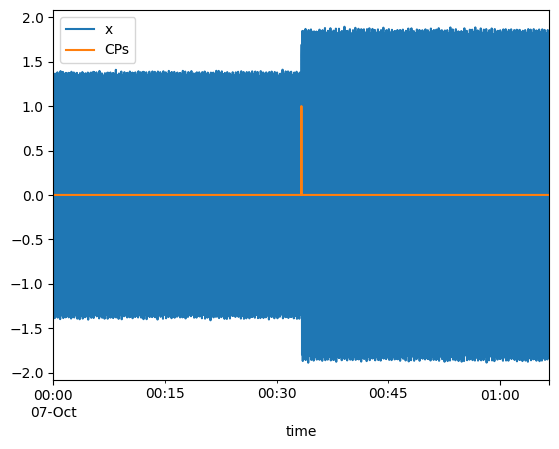

In [25]:
data.plot()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 1999-10-07 00:00:00 to 1999-10-07 01:06:39
Freq: S
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       4000 non-null   float64
 1   CPs     4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 93.8 KB


# Init Model

In [27]:
model = KalmanFilter(df=data, target_column="x",
                     kalman_window = 500,
                     queue_window=100,
                     is_cps_filter_on=True, threshold_std_coeff=3.61)

In [28]:
cps_pred = model.predict()

# Plot Results

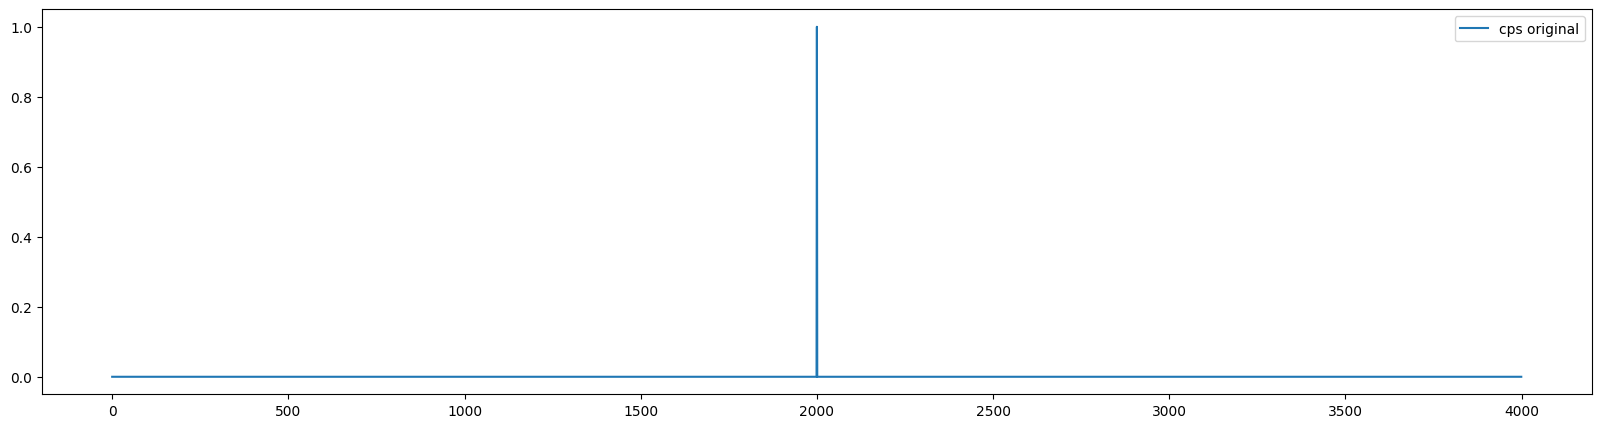

In [29]:
plt.figure(figsize=(20,5))
plt.plot(data["CPs"].values, label='cps original')
plt.legend()

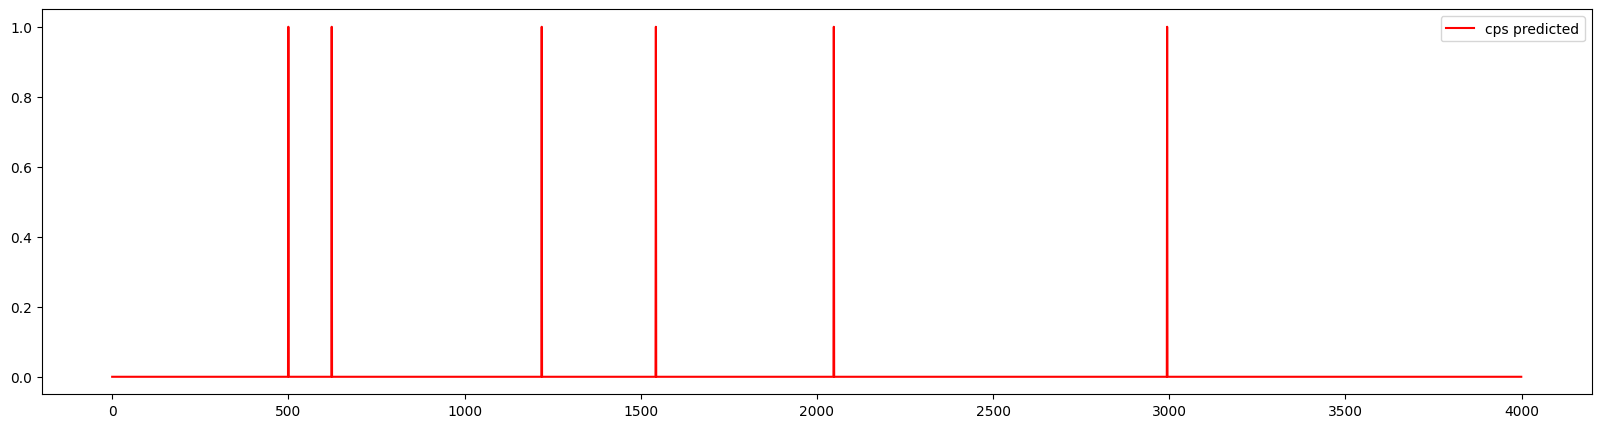

In [30]:
plt.figure(figsize=(20,5))
plt.plot(cps_pred, label='cps predicted', color='red')
plt.legend()

## Plot Forecasted time series

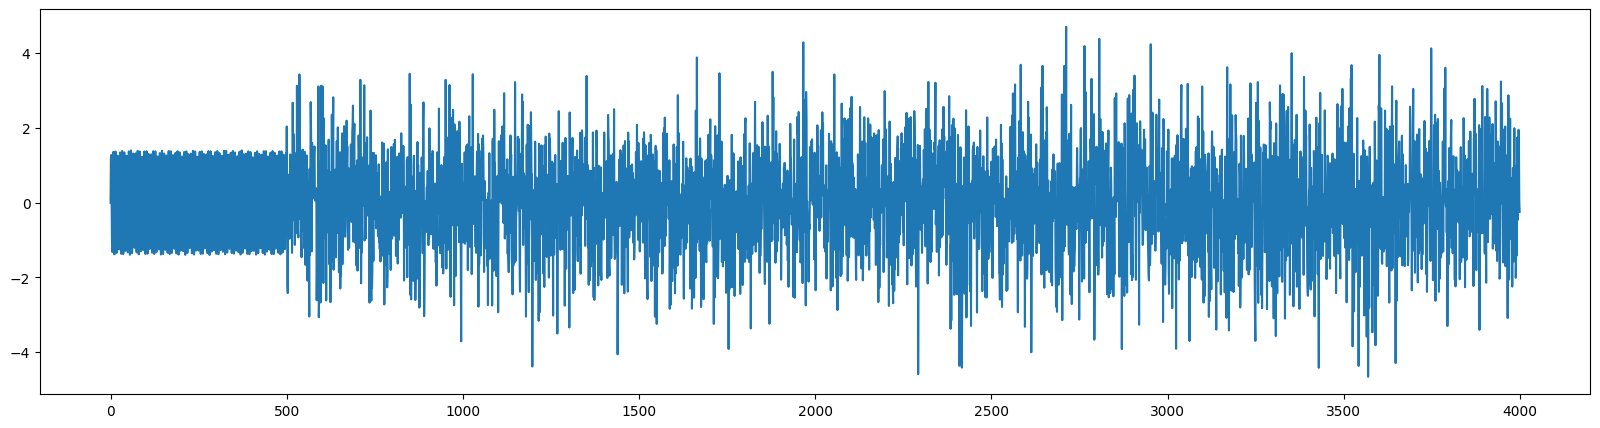

In [31]:
plt.figure(figsize=(20,5))
plt.plot(model.get_full_forecast())

## Plot Original Time-Series

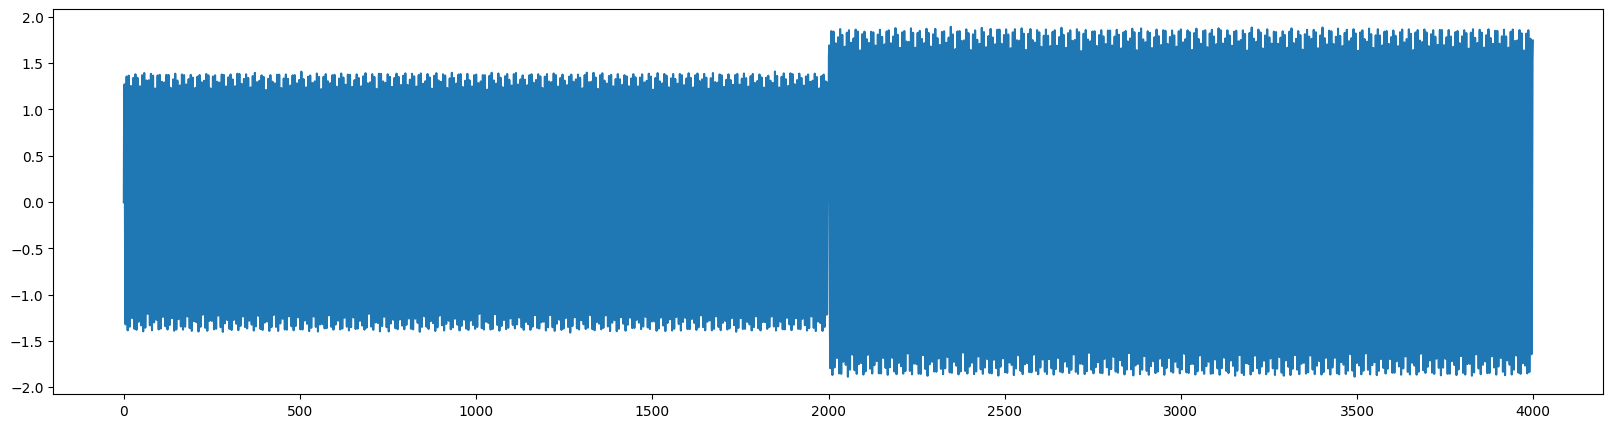

In [32]:
plt.figure(figsize=(20,5))
plt.plot(data['x'].values)

# Residuals

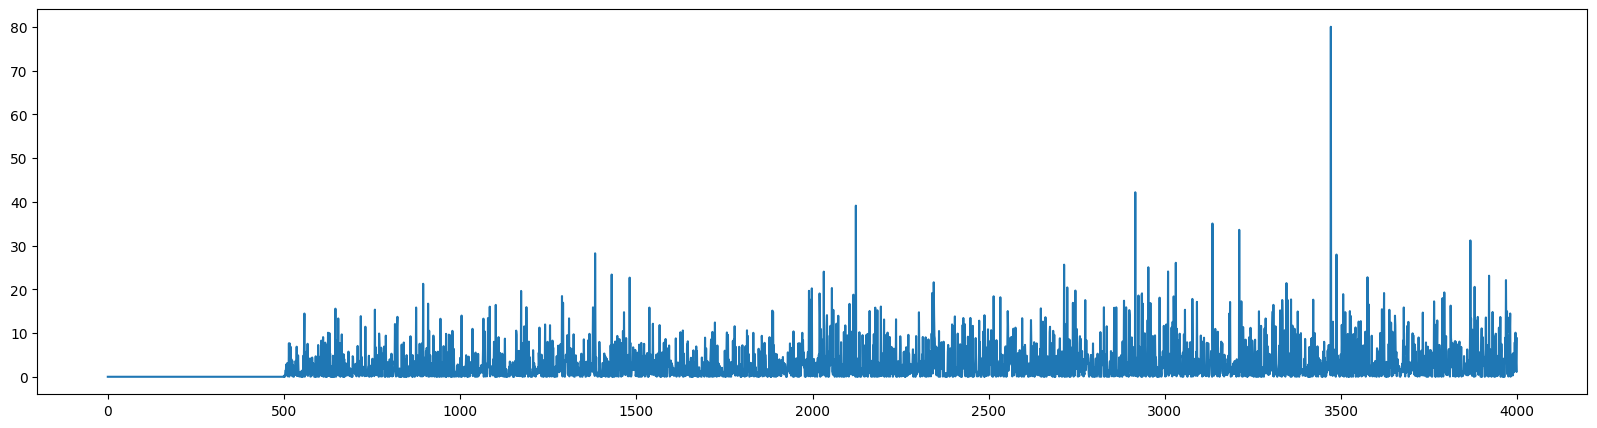

In [33]:
plt.figure(figsize=(20,5))
plt.plot(abs(data['x'].values - model.get_full_forecast())**2)